# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [10]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
df = pd.read_csv(url)


In [11]:
print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())


   Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0           0  DK49336     Arizona              4809.216960       No   
1           1  KX64629  California              2228.525238       No   
2           2  LZ68649  Washington             14947.917300       No   
3           3  XL78013      Oregon             22332.439460      Yes   
4           4  QA50777      Oregon              9025.067525       No   

   Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0     Basic   College           2/18/11         Employed      M  ...   
1     Basic   College           1/18/11       Unemployed      F  ...   
2     Basic  Bachelor           2/10/11         Employed      M  ...   
3  Extended   College           1/11/11         Employed      M  ...   
4   Premium  Bachelor           1/17/11    Medical Leave      F  ...   

   Number of Open Complaints Number of Policies     Policy Type        Policy  \
0                        0.0                  9  Corp

In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

Customer ['DK49336' 'KX64629' 'LZ68649' ... 'KX53892' 'TL39050' 'WA60547']
State ['Arizona' 'California' 'Washington' 'Oregon' nan 'Nevada']
Response ['No' 'Yes' nan]
Coverage ['Basic' 'Extended' 'Premium']
Education ['College' 'Bachelor' 'High School or Below' 'Doctor' 'Master']
Effective To Date ['2/18/11' '1/18/11' '2/10/11' '1/11/11' '1/17/11' '2/14/11' '2/24/11'
 '1/19/11' '1/4/11' '1/2/11' '2/7/11' '1/31/11' '1/26/11' '2/28/11'
 '1/16/11' '2/26/11' '2/23/11' '1/15/11' '2/2/11' '2/15/11' '1/24/11'
 '2/21/11' '2/22/11' '1/7/11' '1/28/11' '2/8/11' '2/12/11' '2/20/11'
 '1/5/11' '2/19/11' '1/3/11' '2/3/11' '1/22/11' '1/23/11' '2/5/11'
 '2/13/11' '1/25/11' '2/16/11' '2/1/11' '1/27/11' '1/12/11' '1/20/11'
 '2/6/11' '2/11/11' '1/21/11' '1/29/11' '1/9/11' '2/9/11' '2/27/11'
 '1/1/11' '2/17/11' '2/25/11' '1/13/11' '1/6/11' '2/4/11' '1/14/11'
 '1/10/11' '1/8/11' '1/30/11']
EmploymentStatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender ['M' 'F']
Location Code ['Suburb

In [ ]:
duplicates = df[df['Customer'].duplicated()]  
print(duplicates)

       Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
334           334  AV76907         NaN              4282.947971      NaN   
441           441  FV22585      Oregon              6960.920371       No   
554           554  AU23837      Oregon              5010.379310       No   
598           598  OW33876  Washington              2476.480866       No   
644           644  SK12432     Arizona              2388.353882       No   
...           ...      ...         ...                      ...      ...   
10890       10890  VQ78876      Oregon              4660.399573       No   
10894       10894  EX63393         NaN              6314.492009      NaN   
10899       10899  WU60905  California              8610.667489       No   
10905       10905  FE99816      Nevada             15563.369440       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage             Education Effective To Date EmploymentStatus  \
334       B

In [16]:
df.columns = df.columns.str.lower().str.replace(' ', '_')  # Normalize column names
duplicates = df[df['customer'].duplicated()]
print(duplicates)

       unnamed:_0 customer       state  customer_lifetime_value response  \
334           334  AV76907         NaN              4282.947971      NaN   
441           441  FV22585      Oregon              6960.920371       No   
554           554  AU23837      Oregon              5010.379310       No   
598           598  OW33876  Washington              2476.480866       No   
644           644  SK12432     Arizona              2388.353882       No   
...           ...      ...         ...                      ...      ...   
10890       10890  VQ78876      Oregon              4660.399573       No   
10894       10894  EX63393         NaN              6314.492009      NaN   
10899       10899  WU60905  California              8610.667489       No   
10905       10905  FE99816      Nevada             15563.369440       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       coverage             education effective_to_date employmentstatus  \
334       B

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


In [20]:
filtered_df = df[(df['total_claim_amount'] > 1000) & (df['response'] == "Yes")]
filtered_df 

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
189,189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,NaN
236,236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A
419,419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A
442,442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,10351,FN44127,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10373,10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2/8/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury SUV,Medsize,NaN
10487,10487,IX60941,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10565,10565,QO62792,Oregon,7840.165778,Yes,Extended,College,1/14/11,Employed,M,...,2.0,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,NaN,NaN,NaN


In [21]:
print(filtered_df.head())


     unnamed:_0 customer       state  customer_lifetime_value response  \
189         189  OK31456  California             11009.130490      Yes   
236         236  YJ16163      Oregon             11009.130490      Yes   
419         419  GW43195      Oregon             25807.063000      Yes   
442         442  IP94270     Arizona             13736.132500      Yes   
587         587  FJ28407  California              5619.689084      Yes   

     coverage             education effective_to_date employmentstatus gender  \
189   Premium              Bachelor           1/24/11         Employed      F   
236   Premium              Bachelor           1/24/11         Employed      F   
419  Extended               College           2/13/11         Employed      F   
442   Premium                Master           2/13/11         Disabled      F   
587   Premium  High School or Below           1/26/11       Unemployed      M   

     ...  number_of_open_complaints number_of_policies     policy_ty

In [24]:
df = df.dropna(subset=['total_claim_amount', 'response'])
df 

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [26]:
filtered_df = df[df['response'] == "Yes"]
filtered_df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
15,15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
19,19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
27,27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,10844,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10872,10872,XT67997,California,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L3,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10887,10887,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2/3/11,Employed,F,...,0.0,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small,A


In [27]:
average_claims = filtered_df.groupby(['policy_type', 'gender'])['total_claim_amount'].mean().reset_index()

average_claims.rename(columns={'total_claim_amount': 'average_total_claim_amount'}, inplace=True)


In [28]:
print(average_claims)


      policy_type gender  average_total_claim_amount
0  Corporate Auto      F                  433.738499
1  Corporate Auto      M                  408.582459
2   Personal Auto      F                  452.965929
3   Personal Auto      M                  457.010178
4    Special Auto      F                  453.280164
5    Special Auto      M                  429.527942


The Personal Auto policy type has the highest average total claim amounts for both genders, making it a significant category for analysis.
Corporate Auto shows the lowest average claim amounts for both genders, potentially due to the nature of claims (e.g., business-focused or lower coverage levels).

In [30]:
state_counts = df.groupby('state').size().reset_index(name='customer_count')
state_counts

,state,customer_count
0,Arizona,1937
1,California,3552
2,Nevada,993
3,Oregon,2909
4,Washington,888


In [31]:
filtered_states = state_counts[state_counts['customer_count'] > 500]
filtered_states 

,state,customer_count
0,Arizona,1937
1,California,3552
2,Nevada,993
3,Oregon,2909
4,Washington,888


In [34]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 249 kB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 12.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


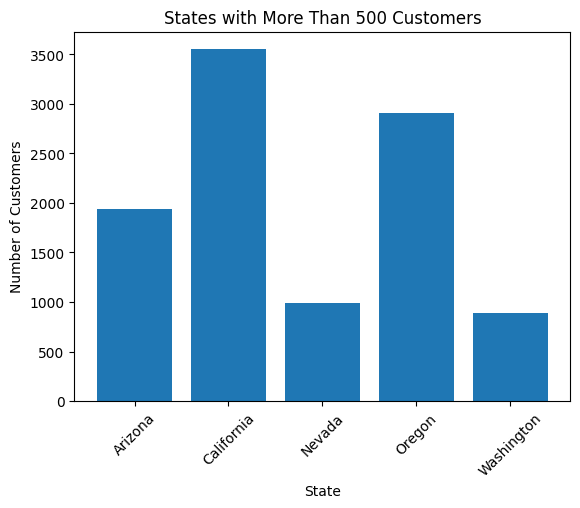

In [35]:
import matplotlib.pyplot as plt

# Plot states with more than 500 customers
plt.bar(filtered_states['state'], filtered_states['customer_count'])
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('States with More Than 500 Customers')
plt.xticks(rotation=45)
plt.show()


In [37]:
clv_stats = df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(
    max_clv='max',
    min_clv='min',
    median_clv='median'
).reset_index()


In [38]:
clv_stats = df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median']).reset_index()


In [39]:
grouped = df.groupby(['education', 'gender'])['customer_lifetime_value']
clv_stats = grouped.agg(['max', 'min', 'median']).reset_index()
clv_stats.columns = ['education', 'gender', 'max_clv', 'min_clv', 'median_clv']


In [40]:
print(df['customer_lifetime_value'].dtype)


float64


In [ ]:
clv_stats = df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(
    max_clv='max',
    min_clv='min',
    median_clv='median'
).reset_index()

print(clv_stats)


              education gender      max_clv      min_clv   median_clv
0              Bachelor      F  73225.95652  1904.000852  5663.500884
1              Bachelor      M  67907.27050  1898.007675  5550.697291
2               College      F  61850.18803  1898.683686  5616.536672
3               College      M  61134.68307  1918.119700  5989.773931
4                Doctor      F  44856.11397  2395.570000  5332.462694
5                Doctor      M  32677.34284  2267.604038  5610.127843
6  High School or Below      F  55277.44589  2144.921535  6054.182016
7  High School or Below      M  83325.38119  1940.981221  6277.011679
8                Master      F  51016.06704  2417.777032  5714.165863
9                Master      M  50568.25912  2272.307310  5580.960642




The analysis shows that **males with a "High School or Below" education have the highest median (\$6,277.01) and maximum CLV (\$83,325.38), making them the most valuable customer group. In contrast, **females with a "Doctor" education have the lowest median CLV (\$5,332.46), indicating lower engagement or contributions. Generally, males tend to have slightly higher CLVs across most education levels. 